## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import re
import random
from sklearn.model_selection import KFold

 

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RepeatedKFold, GridSearchCV, cross_val_score

from sklearn.ensemble import BaggingRegressor, StackingRegressor, VotingRegressor

from numpy import mean
import scipy
import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [2]:
random.seed(111)

# Reading Data

In [3]:
available_ip = pd.read_csv('available_input_corr.csv')
available_ip = available_ip.drop(available_ip.columns[0], axis=1)
available_op = pd.read_csv('available_output_corr.csv')
available_op = available_op.drop(available_op.columns[0], axis = 1)
available_ip

,Count,average_relative_hummidity,daily_mean_celsius,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,...,Country_Germany,Country_Italy,Country_Netherlands,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,54.0,62.6,8.1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54.0,48.8,8.3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,54.0,52.7,10.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.0,54.1,12.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.0,59.5,14.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,21.0,59.5,14.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1832,21.0,66.7,17.6,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1833,21.0,56.2,19.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1834,21.0,73.3,19.2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Engineering using Lasso Regression to Remove Less Significant Features

### Converting features and label dataframe to arrays

In [4]:

features_array = available_ip.values
label_array = available_op.values

### Function to perform 5-fold Cross validation for Lasso Regression for selecting penalty parameter 

In [5]:
def calculate_mse_stddev_penalty_lasso(penalty_parameters) : 

    k_fold_split = 5

    k_fold_split_function =  KFold(n_splits = k_fold_split)

    mean_sqaure_error_penalty = []
    standard_deviation_penalty = []

    for penalty in penalty_parameters : 
        lasso_model = linear_model.Lasso(alpha = 1 / (2 * penalty))
        
        mean_sqaure_error_fold = []
        for train_index, test_index in k_fold_split_function.split(features_array):
            X_train, X_test = features_array[train_index], features_array[test_index]
            y_train, y_test = label_array[train_index], label_array[test_index]
            lasso_model.fit(X_train, y_train)
            predictions = lasso_model.predict(X_test)
            
            mean_sqaure_error_fold.append(mean_squared_error(y_test, predictions))

        mean_sqaure_error_penalty.append(np.array(mean_sqaure_error_fold).mean())
        standard_deviation_penalty.append(np.array(mean_sqaure_error_fold).std())
        
    return mean_sqaure_error_penalty, standard_deviation_penalty


### Testing Lasso model for different penalty parameters

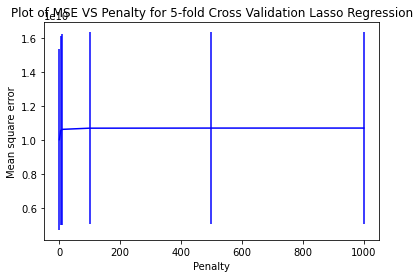

In [6]:
penalty_parameters = [1, 5, 10, 100, 500, 1000]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

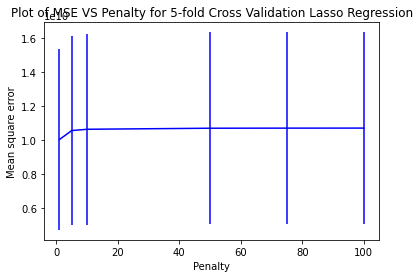

In [7]:
penalty_parameters =  [1, 5, 10, 50, 75, 100]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

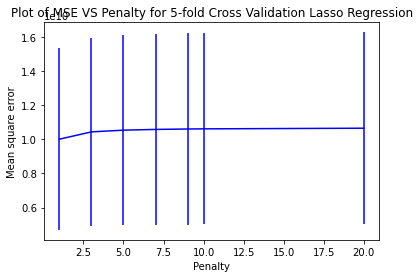

In [8]:
penalty_parameters = [1, 3, 5, 7, 9, 10, 20]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

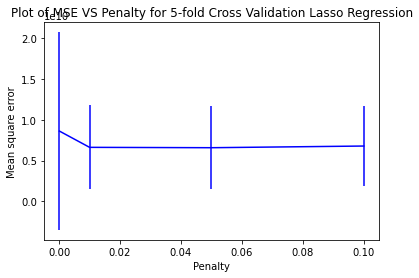

In [9]:
penalty_parameters = [0.0001, 0.01, 0.05, 0.1]

mean_sqaure_error, standard_deviation = calculate_mse_stddev_penalty_lasso(penalty_parameters)

plt.figure()
plt.errorbar(penalty_parameters, mean_sqaure_error, yerr = standard_deviation, color = 'blue')
plt.xlabel('Penalty')
plt.ylabel('Mean square error')
plt.title('Plot of MSE VS Penalty for 5-fold Cross Validation Lasso Regression')
plt.show()

### Getting the name of insignificant features using the ideal penalty parameter range confirmed from above experiment

In [10]:
feature_names = list(available_ip.columns.values)
feature_names.insert(0, 'Penalty')
feature_names.insert(1, 'Intercept')

In [11]:
penalty_parameters = [0.0001,  0.01, 0.05, 0.1]

In [12]:

lasso_model_dictionary = {}
X_Train,X_Test,y_Train,y_Test = train_test_split(available_ip,available_op,test_size = 0.2, random_state=111, shuffle = False)
lasso_model_params_df = pd.DataFrame(columns = feature_names)
lasso_model_equation_df = pd.DataFrame(columns = ['Penalty', 'Model Equation'])
for penalty in penalty_parameters:
    lasso_model = Lasso(alpha = 1 / (2 * penalty))
    lasso_model.fit(X_Train, y_Train)
    
    model_dict = {}
    model_dict['Penalty'] = penalty
    model_dict['Intercept'] = [np.around(lasso_model.intercept_, decimals = 3)]
    for i in range(2, (len(available_ip.columns) + 2)) :
        model_dict[feature_names[i]] = [np.around(lasso_model.coef_[i-2], decimals = 3)]
    
    lasso_model_params_df = lasso_model_params_df.append(model_dict, ignore_index = True)
    
    model_eq_dict = {}
    model_eq_dict['Penalty'] = penalty
    equation_string = ''
    for i in range(2, (len(available_ip.columns) + 2)) :
        coeff = np.around(lasso_model.coef_[i-2], decimals = 3)
        if coeff != 0 : 
            equation_string += '(' + str(coeff) + ')' + ' * ' + feature_names[i] + ' + '
    
    equation_string += '(' + str(np.around(lasso_model.intercept_, decimals = 3)) + ')'
    model_eq_dict['Model Equation'] = equation_string
    
    lasso_model_equation_df = lasso_model_equation_df.append(model_eq_dict, ignore_index = True)
    
    lasso_model_dictionary[penalty] = lasso_model

lasso_model_params_df = lasso_model_params_df.style.applymap(lambda x:'white-space:nowrap')
display(lasso_model_params_df)

lasso_model_equation_df = lasso_model_equation_df.style.set_properties(**{'text-align': 'left'})
lasso_model_equation_df = lasso_model_equation_df.applymap(lambda x:'white-space:nowrap')
display(lasso_model_equation_df)

,Penalty,Intercept,Count,average_relative_hummidity,daily_mean_celsius,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Country_Belgium,Country_France,Country_Germany,Country_Italy,Country_Netherlands,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UAE,Country_UK,Country_US
0,0.000100,[array([-26786.243])],[323.539],[119.306],[5049.987],[0.0],[0.0],[0.0],[-0.0],[-0.0],[0.0],[-0.0],[0.0],[-0.0],[-0.0],[0.0],[-0.0],[-0.0],[0.0],[0.0],[-0.0],[0.0],[-0.0],[-0.0],[17306.471],[-0.0],[0.0],[376342.642],[0.0]
1,0.010000,[array([35891.038])],[-957.269],[67.645],[5625.317],[295.906],[5451.684],[5576.831],[-0.0],[-2623.798],[0.0],[-13291.295],[1714.375],[-5344.927],[-3929.937],[0.0],[-8320.463],[-73253.884],[22452.702],[0.0],[-19839.417],[0.0],[-37967.538],[-22369.3],[80822.449],[-64363.331],[0.0],[442087.133],[28762.945]
2,0.050000,[array([36273.519])],[-971.447],[73.147],[5659.773],[689.716],[5500.024],[6045.967],[-0.0],[-3058.152],[0.0],[-14093.581],[2194.737],[-6013.387],[-4552.034],[0.0],[-9055.477],[-74314.569],[22673.883],[0.0],[-20540.75],[0.0],[-38816.183],[-22943.932],[81080.582],[-65540.719],[0.0],[442368.098],[28828.379]
3,0.100000,[array([58215.56])],[-973.282],[91.478],[5563.513],[1024.524],[6166.559],[5679.754],[-0.0],[-3379.007],[975.483],[-13578.375],[2373.054],[-5636.358],[-4858.032],[0.0],[-8465.741],[-96379.833],[773.227],[-21839.161],[-42552.997],[0.0],[-60845.402],[-44935.574],[59195.44],[-87605.82],[0.0],[420489.292],[6923.798]


,Penalty,Model Equation
0,0.000100,(323.539) * Count + (119.306) * average_relative_hummidity + (5049.987) * daily_mean_celsius + (17306.471) * Country_Spain + (376342.642) * Country_UK + ([-26786.243])
1,0.010000,(-957.269) * Count + (67.645) * average_relative_hummidity + (5625.317) * daily_mean_celsius + (295.906) * Month_Apr + (5451.684) * Month_Aug + (5576.831) * Month_Dec + (-2623.798) * Month_Jan + (-13291.295) * Month_Jun + (1714.375) * Month_Mar + (-5344.927) * Month_May + (-3929.937) * Month_Nov + (-8320.463) * Month_Sep + (-73253.884) * Country_Belgium + (22452.702) * Country_France + (-19839.417) * Country_Italy + (-37967.538) * Country_Poland + (-22369.3) * Country_Portugal + (80822.449) * Country_Spain + (-64363.331) * Country_Switzerland + (442087.133) * Country_UK + (28762.945) * Country_US + ([35891.038])
2,0.050000,(-971.447) * Count + (73.147) * average_relative_hummidity + (5659.773) * daily_mean_celsius + (689.716) * Month_Apr + (5500.024) * Month_Aug + (6045.967) * Month_Dec + (-3058.152) * Month_Jan + (-14093.581) * Month_Jun + (2194.737) * Month_Mar + (-6013.387) * Month_May + (-4552.034) * Month_Nov + (-9055.477) * Month_Sep + (-74314.569) * Country_Belgium + (22673.883) * Country_France + (-20540.75) * Country_Italy + (-38816.183) * Country_Poland + (-22943.932) * Country_Portugal + (81080.582) * Country_Spain + (-65540.719) * Country_Switzerland + (442368.098) * Country_UK + (28828.379) * Country_US + ([36273.519])
3,0.100000,(-973.282) * Count + (91.478) * average_relative_hummidity + (5563.513) * daily_mean_celsius + (1024.524) * Month_Apr + (6166.559) * Month_Aug + (5679.754) * Month_Dec + (-3379.007) * Month_Jan + (975.483) * Month_Jul + (-13578.375) * Month_Jun + (2373.054) * Month_Mar + (-5636.358) * Month_May + (-4858.032) * Month_Nov + (-8465.741) * Month_Sep + (-96379.833) * Country_Belgium + (773.227) * Country_France + (-21839.161) * Country_Germany + (-42552.997) * Country_Italy + (-60845.402) * Country_Poland + (-44935.574) * Country_Portugal + (59195.44) * Country_Spain + (-87605.82) * Country_Switzerland + (420489.292) * Country_UK + (6923.798) * Country_US + ([58215.56])


## Dropping insignificant features

In [13]:

available_ip.drop('Month_Feb', inplace=True, axis=1)
available_ip.drop('Month_Jul', inplace=True, axis=1)
available_ip.drop('Month_Oct', inplace=True, axis=1)
available_ip.drop('Country_Germany', inplace=True, axis=1)
available_ip.drop('Country_Netherlands', inplace=True, axis=1)
available_ip.drop('Country_UAE', inplace=True, axis=1)
print(available_ip.columns)
available_ip

Index(['Count', 'average_relative_hummidity', 'daily_mean_celsius',
       'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Jan', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Sep', 'Country_Belgium',
       'Country_France', 'Country_Italy', 'Country_Poland', 'Country_Portugal',
       'Country_Spain', 'Country_Switzerland', 'Country_UK', 'Country_US'],
      dtype='object')


,Count,average_relative_hummidity,daily_mean_celsius,Month_Apr,Month_Aug,Month_Dec,Month_Jan,Month_Jun,Month_Mar,Month_May,...,Month_Sep,Country_Belgium,Country_France,Country_Italy,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_UK,Country_US
0,54.0,62.6,8.1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,54.0,48.8,8.3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,54.0,52.7,10.2,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,14.0,54.1,12.1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,14.0,59.5,14.8,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,21.0,59.5,14.8,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1832,21.0,66.7,17.6,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1833,21.0,56.2,19.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1834,21.0,73.3,19.2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Applying Lasso Regression to train the model

In [14]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = Lasso(alpha = 1/(2*10))
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.8108702007452108
1 --> 0.8000968466620199
2 --> 0.7916438348206558
3 --> 0.7901097493094873
4 --> 0.7902970594005552
5 --> 0.7921114294005859
6 --> 0.7944694821799891
7 --> 0.7938318932644547
8 --> 0.7949126550575772
9 --> 0.7969434390814836


# Applying Linear Regression to train the model

In [15]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = LinearRegression()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.8242246622534593
1 --> 0.8178175628959448
2 --> 0.8149274127484746
3 --> 0.8112533071295365
4 --> 0.8108856688843842
5 --> 0.8108276164737033
6 --> 0.8078459569928507
7 --> 0.8100905039808477
8 --> 0.809215689478982
9 --> 0.807739635966971


# Applying Ridge Regression to train the model

In [16]:
scores = []

for each_outer in range(0,10):
    for each_inner in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
        reg = Ridge()
        reg.fit(X_train, y_train)

        reg.predict(X_test)
        accuracy = reg.score(X_test, y_test)
        scores.append(accuracy)
    
    print(str(each_outer) + ' --> ' + str(mean(scores)))

0 --> 0.7944167200889699
1 --> 0.8033988398245564
2 --> 0.8013260857953406
3 --> 0.807046825392429
4 --> 0.8059207439304614
5 --> 0.8040858070413239
6 --> 0.8035924805056143
7 --> 0.8063495007770058
8 --> 0.8044404640475278
9 --> 0.8048505062468532


## Getting Feature Importance from Linear Regression Model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(available_ip, available_op, test_size = 0.3)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)


LinearRegression()

In [18]:
Feature_Importance_DF = pd.DataFrame(list(X_train.columns), columns = ["Feature Name"]).copy()
Feature_Importance_DF.insert(len(Feature_Importance_DF.columns),"Importance",np.absolute(linear_regression_model.coef_).transpose())
Feature_Importance_DF

,Feature Name,Importance
0,Count,630.882362
1,average_relative_hummidity,154.512926
2,daily_mean_celsius,4948.503546
3,Month_Apr,1715.664970
4,Month_Aug,131.598545
5,Month_Dec,6936.281376
6,Month_Jan,2079.485974
7,Month_Jun,13695.694833
8,Month_Mar,1133.030228
9,Month_May,5662.661356


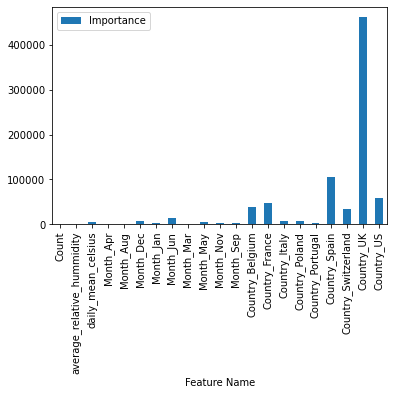

In [19]:
ax = Feature_Importance_DF.plot.bar(x='Feature Name', y='Importance', rot=0)
plt.xticks(rotation=90)
plt.show()